<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_TA4_u201818067/blob/main/PDI_TA4_u201818067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento Digital de Imágenes - Detección y segmentación

> **Código de Alumno**: u201818067

> Moreno Carhuacusma, Dante Brandon

> UPC

> 2020 - 2

## Objetivos:

##Ejercicio: Detección y Segmentación

### Detección de discontinuidades

En procesamiento de imágenes, las discontinuidades buscadas son puntos, segmentos de rectas, bordes y uniones. El objetivo de detectar estas descontinuidades es obtener mejor información sobre los objetos representados, ayudando a reducir la cantidad de data a ser procesada después.

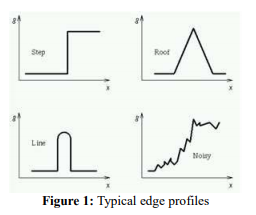

*Figura extraída de Rani & Kumari, para International Journal of Science and Research (2016)*

Gráficamente, ver la variación del nivel de gris en la posición permite identificar el tipo de discontinuidad presente en una región.

Sharifi (2002), divide a los detectores de de contornos, o discontinuidades, en:
* **Detectores de gradiente**: Los operadores **clásicos**, usan la primera derivada direccional. Algoritmos como Sobel (1970), Prewitt (1970), Kirsch (1971), etc. Sus ventajas son la **simplicidad** y la detección de la **orientación** de los bordes; sin embargo, presentan **sensitividad al ruido** y pueden no ser precisos.

* **Zero Crossing**: aquellos que utilizan segunda derivada,incluye el operador Laplaciano y segunda derivada direccional. Detecta los contornos y su **orientación**, además de tener características fijas para todas las direcciones. Sin embargo, también presentan **sensitividad** al ruido y pueden repetir respuesta a algunos bordes ya detectados.

* **Laplacian of Gaussian (LoG)**: inventado por Marr y Hildreth (1980), combinando filtro Gaussiano con el Laplaciano. No es muy común en el área de *computer vision*. Pueden encontrar los lugares correctos de los bordes, y examinan una mayor área alrededor de un pixel. Sin embargo, **no encuentra orientación** y puede **malfuncionar en esquinas**.

* **Gaussianos**: Simétricos a lo largo del borde, y reducen el ruido al suavizar la imagen. Los más destacados son Canny e ISEF (Shen-Castan), que convolucionan la imagen con la función Gaussiana para Canny, y la derivada ISEF para ShenCastan. Las ventaja de estos detectores son el uso de técnicas estadísticas de probabilidad para encontrar una **razón de error, localización, y mejor manejo de ruido**. Estas operaciones resultan en operaciones complejas y que **consumen tiempo**.

* **Detectores de contornos coloridos**: Se dividen en métodos de fusión de output, métodos de gradiente multidimensional,  y métodos con vectores. Resultan precisos y más eficientes en **reconocimiento de objetos**; sin embargo, son **complejos**.

####Detectores con Gradiente

> *Imágenes extraídas de Programmersought*



#####Operador de Roberts

Introducida por Lawrence Roberts en 1965, es una operación computacional simple. Enfatiza regiones de alta frequencia espacial, que normalmente corresponden a bordes. Recibe una imagen en escala de grises, y lo más común es devolver la misma filtrada.

Mide la gradiente espacial en dos dimensiones. De manera simplificada, computa la diferencia local.

$\nabla f[i,j] = |f[i,j] - f[i+1,j+1]| + |f[i,j+1] - f[i+1,j]| $


$\nabla f[i,j] = |G_x| + |G_y| $

La expresión puede representarse con la siguiente máscara:

$$ G_x = \begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}; G_y = \begin{bmatrix}
0 & -1\\
0 & 0
\end{bmatrix} $$

Obteniendo así los bordes horizontales o verticales, o ambos si se suman las imágenes resultantes.

#####Operador de Sobel

Introducida en 1970, el método de Sobel de detección de bordes para segmentación de imágenes encuentra contornos usando la aproximación de Sobel a la derivada. Resalta regiones con alta frecuencia espacial, y generalmente se emplea para hallar la magnitud absoluta estimada de la gradiente en cada punto de la imagen en escala de grises. (Rani & Kumari, 2016)

En un pixel $(i,j)$ de la imagen:
\begin{bmatrix}
a_0 & a_1 & a_2\\
a_7 & (i,j) & a_3\\
a_6 & a_5 & a_4
\end{bmatrix}

$\nabla f_x = (a_2 + ca_3 + a_4) - (a_0 + ca_7 + a_6)$

$\nabla f_y = (a_0 + ca_1 + a_2) - (a_6 + ca_5 + a_4)$


Sobel, a diferencia de Roberts, computa los valores de la gradiente en el dominio 3*3. Las expresiones de las gradientes puden representarse con máscaras:

Con $c=2$:


$G_x = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}, G_y = \begin{bmatrix}
 1 & 2 & 1\\
 0 & 0 & 0\\
-1 & -2 & -1
\end{bmatrix}
$

##### Operador de Prewitt

El operador de Prewitt es similar al de Sobel, sin una constante c.

$G_x = \begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1
\end{bmatrix}, G_y = \begin{bmatrix}
 1 & 1 & 1\\
 0 & 0 & 0\\
-1 & -1 & -1
\end{bmatrix}
$

##### Operador de Kirsch

Publicado en 1971, las máscaras de la técnica de Kirsch se definen rotando una sola en las ocho direcciones principales de un compás (norte, noroeste, oeste, suroeste, sur, sudeste,este y noreste), o un giro de 45° por máscara. 

$M_1 = \begin{bmatrix}
5 & 5 & 5\\
-3 & 0 & -3\\
-3 & -3 & -3
\end{bmatrix}, 
M_2 = \begin{bmatrix}
-3 & 5 & 5\\
-3 & 0 & 5\\
-3 & -3 & -3
\end{bmatrix}, 
M_3 = \begin{bmatrix}
-3 & -3 & 5\\
-3 & 0 & 5\\
-3 & -3 & 5
\end{bmatrix}, 
M_4 = \begin{bmatrix}
-3 & -3 & -3\\
-3 & 0 & 5\\
-3 & 5 & 5
\end{bmatrix} $

$M_5 = \begin{bmatrix}
-3 & -3 & -3\\
-3 & 0 & -3\\
5 & 5 & 5
\end{bmatrix},
M_6 = \begin{bmatrix}
-3 & -3 & -3\\
5 & 0 & -3\\
5 & 5 & -3
\end{bmatrix},
M_7 = \begin{bmatrix}
5 & -3 & -3\\
5 & 0 & -3\\
5 & -3 & -3
\end{bmatrix},
M_8 = \begin{bmatrix}
5 & 5 & -3\\
5 & 0 & -3\\
-3 & -3 & -3
\end{bmatrix}
$

La magnitud del borde está definida por el valor máximo de la convolución de cada máscara con la imagen. La dirección está definida por la máscara que produjo dicha magnitud.

####Detectores Gaussianos: Canny

Creado por John Canny en 1986, incluso hoy en día, aún supera en resultados a muchos algoritmos desarrollados después. (Rani & Kumari, 2016). Es un algoritmo multi etapas:
* **Reducción de ruido**: Comúnmente usa la función Gaussiana como filtro para suavizar la imagen. Esto hace que algunos bordes se difuminen un poco, por lo que el borde calculado tiene un ancho. La implementación en Open CV es un filtro Gaussiano de 5x5.
* **Encontrar la gradiente de la intensidad**: La imagen resultante es filtrada con Sobel horizontal y verticalmente para obtener las derivadas de ambas direcciones.

> Gradiente de un Borde (G)
> $$ G = \sqrt{G_x^2 + G_y^2}$$

> Con el resultado de Sobel ($G_x$ y $G_y$) se determina la magnitud de la gradiente, y luego su dirección.

> Ángulo ($\theta$):
> $$\theta = tan^{-1}(\frac{G_y}{G_x})$$

> La dirección de la gradiente siempre es perpendicular a los bordes. Se redondea a uno de cuatro ángulos posibles, representando dirección vertical, horizontal y dos diagonales.



* **Non-maximal suppresion**: El método para reducir el grosor de los contornos。Se realiza un escaneo de la imagen para quitar pixeles no deseados que no sean parte del borde. En cada pixel, este es revisado si es un máximo local en su vecindad en la dirección de la gradiente. El resultado es una imagen binario con bordes delgados

* **Umbralización**: Finalmente, se determina qué bordes son realmente bordes y cuáles no con dos umbrales, *minVal* y *maxVal*. Aquellos contornos con gradiente de intensidad mayor que *maxVal* se consideran bordes seguros, mientras se descartan aquellos menores a *minVal*. Los contornos en medio son clasificados según su conectividad con otros contornos. Esta etapa también elimina el ruido al asumir que los bordes son líneas largas.

> 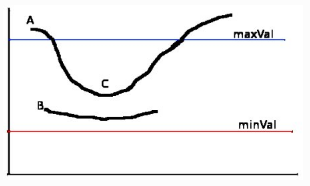

> El borde A, con intensidad mayor a *maxVal* es considerado un “borde seguro”. Aunque C está debajo de *maxVal*, está conectado a A, así que también se le considera borde y completa la curva. Por otro lado B, está en la misma región que C (mayor a *minVal* y menor a *maxVal*), pero no está conectado a ningún "borde seguro", así que es descartado.

> (*Ejemplo extraído de OpenCV - Python Tutorials*)

### Transformada de Hough

El objetivo de la transformada de Hough es la detección de un conjunto de puntos en la imagen que pertenecen a una curva específica, tal como el segmento de recta, circunferencia, elipse y otras. 

Para esto, emplea los conceptos del espacio de parámetros. Comúnmente representamos en el espacio en un sistema de coordenadas con ejes *'x'* e *'y'*, donde una línea puede ser representada con y = m*x + b, siendo m la pendiente de la recta y b la intercepcción con el eje *y*.

Hough plantea un espacio que toma como ejes a 'm' y 'b', los parámetros de la ecuación lineal.

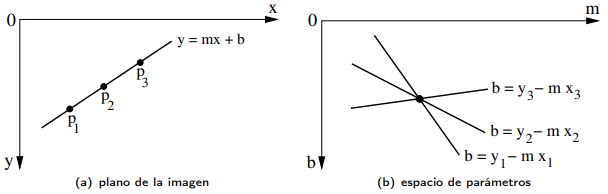

> *Imagen extraída de Pedrini, traducción de González Valenzuela, R.*

Así, una recta en el plano de la imagen se representa como un punto en el espacio de parámetros. Por otro lado, una recta en el espacio de parámetros representa a todas las rectas que podrían cruzar un punto (x, y); entonces, un punto en el plano de la imagen es una curva en el espacio de parámetros.

Una forma simple será representada por algunos parámetros. Por ejemplo, la línea necesita solo pendiente e intercepto, y un círculo puede representarse con 'x', 'y' y el radio.

La transformada de Hough, si desea buscar líneas, tendrá un problema si la recta es vertical, ya que la pendiente tiende al infinito. Por eso, en lugar de emplear la ecuación 
> $y = mx + b$

utiliza la forma polar:
> $\rho = x*cos\theta + y*sen\theta$

Donde rho es la distancia perpendicular del origen a la recta y theta el ángulo formado por esta recta perpendicular y el eje 'x'

> 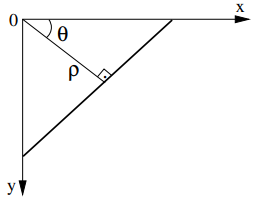

Se discretiza el espacio de parámetros y se obtiene una malla

>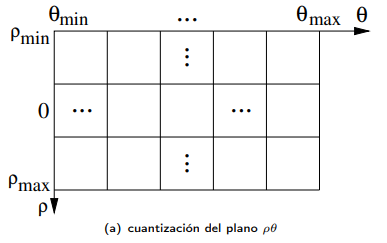

Donde theta puede variar de 0 a 180°, y rho de 0 a la raíz de la suma de cuadrados de M y N, la dimensión de la imagen. El número de celdas depende del intervalo de incremento de los parámetros, y determina la precisión.

Donde cada celda (rho,theta) es llamada una **celda de acumulación**.

Entonces, para círculos se busca transformar la función:

> 1. $(x-a)^2 + (y-b)^2 = r^2$
> 2. $x = a + r \cos\theta; y = b + r\sin\theta$
> 3. $a = x - r \cos\theta; b = y - r\sin\theta$

> Uniendo las últimas ecuaciones:
> 4. $b=a\tan\theta - x \tan\theta + y$

Discretizando los parámetros, las celdas de acumulación para los círculos estarían en (a,b), los parámetros que definen el centro de la circunferencia

1. Todas las celdas de acumulación inician con valor 0.
2. Por cada punto (x,y) de la imagen, calcula los valores de los parámetros que satisfacen la ecuación. Para círculos: a y b.
3. Calcula la magnitud de la gradiente en x,y y el ángulo
4. Para cada punto, incrementa las celdas de acumulación que cumplan la ecuación
5. Los picos locales en la matriz de acumulación son los centros de las circunferencias detectadas.

La implementación de OpenCV incluye los parámetros:
* dp: Ratio inverso de la resolución del acumulador con la resolución de la imagen. Por ejemplo, si vale 1, el acumulador tendrá la misma resolución que la imagen de entrada MxN. Si fuera 2, el acumulador tendría tamaño (M/2 x N/2.
minDist: Minimum distance between the centers of the detected
* min_dist: Distancia mínima entre los centros detectados.
* param_1: Umbral superior (maxVal) para el Canny interno.
* param_2: Umbral para la detección de centros. Más pequeño, detecta más círculos falsos.
* min_radius: El mínimo radio a ser detectado.
* max_radius: El máximo radio a ser detectado.

En cv2, el arreglo de salida indica la posición y radio de cada círculo hallado ( `[posición en x, posición en y, radio]` )

### Comparación de imágenes

#### Coeficiente de Pearsson

Indica si dos variables, en el caso de imágenes, las intensidades de dos imágenes en la misma posición, varían conjuntamente

Coeficiente de correlación de Pearson (r):
$$ r = \frac{cov(x,y)}{s_x s_y} = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{(N-1)s_x s_y} $$

En dos imágenes *f* y *g*:

$$r = \frac{\sum_{x=0}^{M-1}{\sum_{y=0}^{N-1}{[f(x,y)-u_f][g(x,y)-u_g]}}}{\sqrt{\sum_{x=0}^{M-1}{\sum_{y=0}^{N-1}{[f(x,y)-u_f]^2[g(x,y)-u_g]^2}}}}$$

Donde las imágenes *f* y *g* son de dimensiones *M x N*

Donde la correlación en base al resultado *r*, en un rango de 0 a 1, comúnmente se interpreta de la siguiente manera:
- | r | <= 0.1 : Despreciable
- 0.1 < | r | <= 0.3: Baja
- 0.3 < | r | <= 0.5: Mediana
- | r | > 0.5: Fuerte o alta

#### Template Matching

Este método se utiliza para buscar la localización de una imagen plantilla (*template*). Desliza la plantilla sobre la imagen de entrada y compara.

Cuando el template es deslizado, en cada posición, se calcula qué tan bueno o malo sea el parecido de la porción de la imagen en la que la plantilla está superpuesta. Este cálculo de la similitud se puede dar con varias métricas, recibidas como parámetro. El resultado es almacenado en una matriz R, que se retorna como una imagen en escala de grises.

Donde:
- $T$ es la imagen plantilla, o template, de tamaño $w$x$h$.
- $I$ es la imagen de entrada, de tamaño $M$x$N$.
- $x$ e $y$ son la posición en la imagen $I$.
- El rango de $x'$ es {0,1,2,3,... $w-1$}
- El rango de $y'$ es {0,1,2,3,... $h-1$}

Open CV plantea las métricas:
- TM_SQDIFF: Squared Difference 
$$ R(x,y)=\sum_{x′,y′}(T(x′,y′)−I(x+x′,y+y′))2 $$
- TM_SQDIFF_NORMED: Squared Difference Normalizado
$$ R(x,y)= \frac{\sum_{x′,y′}(T(x′,y′)−I(x+x′,y+y′))^2}{\sqrt{\sum_{x′,y′}T(x′,y′)2*\sum_{x′,y′}I(x+x′,y+y′)^2}} $$
- TM_CCORR:
$$ R(x,y)=\sum_{x′,y′}(T(x′,y′)⋅I(x+x′,y+y′)) $$
- TM_CCOEFF:
$$R(x,y)=\sum_{x′,y′}(T′(x′,y′)⋅I′(x+x′,y+y′))$$
> Donde:

> - $T′(x′,y′)=T(x′,y′)−1/(w⋅h)⋅\sum_{x′′,y′′}T(x′′,y′′)$
> - $I′(x+x′,y+y′)=I(x+x′,y+y′)−1/(w⋅h)⋅\sum_{x′′,y′′}I(x+x′′,y+y′′)$

CCORR y CCOEFF también cuentan con sus versiones normalizadas

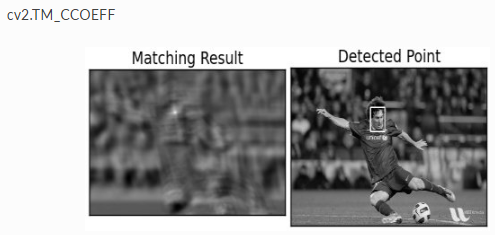

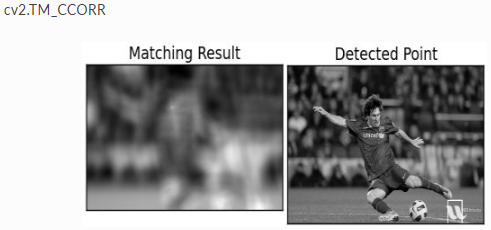

*Ejemplos extraído de OpenCV Tutorials*

El resultado es una matriz, similar a la imagen, con los valores de la métrica en cada pixel. Visto de manera gráfica, en la imagen en escala de grises, el pixel con mayor brillo (mayor intensidad) indica el inicio de la región donde se encuentra la plantilla buscada.

La localización de la región detectada se puede definir con MinMaxLoc, si es que se espera 1 sola ocurrencia del objeto; o un umbral, con `localizaciones = np.where(resultado >= umbral)`

### Metodología

#### 1. Preprocesamiento

Una vez cargada la imagen de entrada, se le convierte a escala de grises.
A esta imagen en escala de grises se le aplica un filtro para resaltar los bordes.

#### 2. Segmentar

Se ingresa la imagen filtrada a la función HoughCircles, para obtener el arreglo de círculos hallados (centro y radio). Luego se separa de la imagen las secciones donde se encuentran los círculos: 

```
cx, cy, radio = circulo ## Posición del centro 'c' y radio
im = filtrada[cy-radio:cy+radio,cx-radio:cx+radio]
```



Se guardan los recortes a un arreglo de imágenes de las candidatas a monedas

#### 3. Comparar

Con coeficiente de Pearson o Template Matching se comparan las candidatas a monedas con imágenes de referencia de monedas.

Esta sección es un algoritmo *greedy*, ya que apenas una candidata sea reconocida, se le asigna un valor en un arreglo paralelo y salta a la siguiente etapa.

En caso de no hallar ninguna coincidencia en la primera pasada, rota las imágenes de referencia 90° en el sentido horario, en caso la imagen de entrada presente monedas desorientadas. Al mismo tiempo, cada vez que se complete una "vuelta" de las imágenes de referencia, se baja el umbral hasta llegar a una coincidencia.

#### 4. Asignar valores

Con el propósito de disminuir el tiempo de procesamiento que llevaría una comparación exhaustiva a cada candidata a moneda con las imágenes de referencia, la asignación de valores es escalamiento del radio.

>Valor en soles | Diámetro
>--- | ---
> 0.10| 20.5 mm
> 0.20| 23 mm
> 0.50| 22 mm
> 1.00| 25.5 mm
> 2.00|22.2 mm
> 5.00|24.3 mm


Se considera un factor de error, que compromete casos como confundir una moneda de 50 céntimos y una de 2 soles solamente por el tamaño.

Esta parte se realizar una sola vez, con aquellos candidatos que no fueron asignados descartados como monedas. Se asume que fueron confundidas desde la transformada de Hough producto de ruido en la imagen.

## Código

###Importando librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io, filters, img_as_ubyte
from google.colab.patches import cv2_imshow

###Operadores de Detección de bordes

#### Operador de Roberts

In [2]:
def roberts(baw, arr=[True for _ in range(2)]): # baw: Imagen en escala de grises; x,y: booleans de en qué eje aplicar
  x = arr[0]
  y = arr[1]
  m_x = np.array([[ 1, 0],
                  [ 0,-1]])
  m_y = np.array([[-1, 0],
                  [ 0, -1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Sobel / Prewitt

In [3]:
def sobel_prewitt(baw, c=2, arr=[True for _ in range(2)]):
  x = arr[0]
  y = arr[1]
  m_x = np.array([[-1, 0, 1],
                  [-c, 0, c],
                  [-1, 0, 1]])
  m_y = np.array([[ 1, c, 1],
                  [ 0, 0, 0],
                  [-1,-c,-1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Kirsch

In [4]:
def kirsch(baw,arr=[True for _ in range(8)],dumb=True):
  mascaras = [np.array([[ 5, 5, 5],
                        [-3, 0,-3],
                        [-3,-3,-3]]),
              np.array([[-3, 5, 5],
                        [-3, 0, 5],
                        [-3,-3,-3]]),
              np.array([[-3,-3, 5],
                        [-3, 0, 5],
                        [-3,-3, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0, 5],
                        [-3, 5, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0,-3],
                        [ 5, 5, 5]]),
              np.array([[-3,-3,-3],
                        [ 5, 0,-3],
                        [ 5, 5,-3]]),
              np.array([[ 5,-3,-3],
                        [ 5, 0,-3],
                        [ 5,-3,-3]]),
              np.array([[ 5, 5,-3],
                        [ 5, 0,-3],
                        [-3,-3,-3]])]
  dArr = []    
  final = np.zeros(baw.shape,dtype=np.uint8)
  for i in range(8):
    if dumb and arr[i]:
      filtrada = cv2.filter2D(baw,-1,mascaras[i])
      final = final + filtrada
    if not dumb:
      dArr.append(cv2.filter2D,baw,-1,mascaras[i]) # D_Arr guarda los resultados de la derivada en las 8 direcciones
  if dumb:
    return final
  #Si no es dumb, seleccionará el mayor d por pixel como dice la teoría
  m,n = baw.shape
  for i in range(m):
    for j in range(n):
      aux = []
      for d in dArr:
        aux.append(d[i][j])
      final[i][j] = np.max(aux)
  return final

#### Función para edgeDetection

In [5]:
def edgeDetection(imagen, operador, arr = [True for _ in range(8)], c=2, usaC = False):
  # Si la imagen no está en escala de grises, convertirla a escala de grises
  if len(imagen.shape) > 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
  filtrada = [] # >> Imagen Filtrada
  if usaC:
    filtrada = operador(imagen,c,arr)
  else:
    filtrada = operador(imagen,arr)
  if type(filtrada[0][0]) != np.uint8: #...Si el 'operador' es función de skimage devuelve float
    filtrada = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
  return filtrada

Función adicional que ahorra tiempo si se va a emplear el mismo filtro con los mismos parámetros varias veces durante el algoritmo

In [33]:
def funcionFiltro(operador=sobel_prewitt,arr=[True for _ in range(8)], c = 2, usaC = False, isCanny = False, minC=50,maxC=170):
  if isCanny:
    def auxCanny(imagen):
      if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Convierte la imagen a escala de grises  
      return cv2.Canny(imagen,minC,maxC)
    return auxCanny
  if usaC:
    def auxEdgeDetection(imagen):
      if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Convierte la imagen a escala de grises
      filtrada = operador(imagen,c,arr)
      return filtrada
    return auxEdgeDetection
  def auxEdgeDetection(imagen):
    if len(imagen.shape) > 2:
      imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Convierte la imagen a escala de grises
    filtrada = operador(imagen,arr)
    return filtrada
  return auxEdgeDetection

### Transformada de Hough

####Círculos

In [7]:
def HoughCirculo(filtrada, distMin, maxCanny, lessError, minRadio, maxRadio, orig = [[0 for _ in range(2)]]):
  circles = cv2.HoughCircles(filtrada, cv2.HOUGH_GRADIENT, 1, distMin, 
                             param1=maxCanny, param2=lessError, minRadius=minRadio, maxRadius=maxRadio)
  aux = [] # Imagen auxiliar para imagen con circulos encima
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = filtrada.copy()
    aux = cv2.cvtColor(aux,cv2.COLOR_GRAY2BGR)
  j = 1
  if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    for i in circles:
      center = (i[0],i[1])
      radius = i[2]
      #cv2.circle(aux, center, 1, (0, 100, 100), 2) #Dibujar centro
      ## 
      aux = cv2.putText(aux, str(j), center, cv2.FONT_HERSHEY_SIMPLEX, 1, 
                        (255,0,0), 2, cv2.LINE_AA) 
      ## 
      j += 1
      cv2.circle(aux, center, radius, (255, 0, 255), 2) #Dibuja los circulos
  return circles, aux

#### Líneas

In [8]:
def HoughLineas(filtrada,minLinea = 100,maxGap = 10,orig = [[0 for _ in range(2)]]):
  aux = []
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = cv2.cvtColor(filtrada,cv2.COLOR_GRAY2BGR)
  lines = cv2.HoughLinesP(filtrada,1,np.pi/180,100,minLinea,maxGap)
  if lines is not None:
    for x1,y1,x2,y2 in lines[0]:
      cv2.line(aux,(x1,y1),(x2,y2),(0,255,0),2)
    return lines[0], aux
  return [0]

###Funciones adicionales para determinar tipo de moneda

####Para crear función lineal simple

Las funciones *calcm()* y *creaymxb()* son auxiliares para generar una función lineal simple que permita convertir la distancia en la imagen de entrada a su escala real en milímetros

In [9]:
def calcm(pt1,pt2):
  return (pt2[1] - pt1[1]) / (pt2[0] - pt1[0])

In [10]:
def creaymxb(m,b):
  def aux(x):
    return m*x + b
  return aux

####Rotar imágenes de un arreglo

In [11]:
def rotarArrIm(arrIm,cv2Funcion):
    auxArr = []
    for imagen in arrIm:
      auxArr.append(cv2.rotate(imagen, cv2Funcion))
    return auxArr

####Homogeneizar tamaño de las imágenes

La función *homoShape()* recibe dos imágenes, se asumen cuadradas o del mismo ratio, y reduce la imagen más grande a las dimensiones de la más pequeña.

In [12]:
def homoShape(im1,im2):
  M1,_ = im1.shape
  M2,_ = im2.shape
  minM = min(M1,M2)
  if M1 != minM:
    im1 = cv2.resize(im1,im2.shape)
  elif M2 != minM:
    im2 = cv2.resize(im2,im1.shape)
  return im1,im2

In [13]:
def extraerCentro(im,ratio=0.5):
  s = im.shape[0] #Se asume todo son imágenes cuadradas, no necesita el alto
  y = (1.0 - ratio) / 2.0
  pQ = round(y*s)
  uQ = round((1-y)*s)
  return im[pQ:uQ,pQ:uQ]

#### Separar la imagen por Monedas

La función *separarMonedas()* recibe como entrada un arreglo de círculos (en formato [posición x, posición y, radio] ) y la imagen filtrada o en blanco o negro que se quiere recortar. Retorna un arreglo de imágenes cuadradas de las monedas según el arreglo de entrada.

In [14]:
def separarMonedas(circulos, filtrada):
  monedas = []
  circulos_tomados = []
  #print("Se parte la imagen de tamaño",filtrada.shape)
  for circulo in circulos:
    cx, cy, radio = circulo
    im = filtrada[cy-radio:cy+radio,cx-radio:cx+radio]
    #print(">:",im.shape)
    #Qué pasa si asume círculo sale del dominio de Imagen?:
    if im.shape[0] == im.shape[1] and im.shape[0] > 0:
      monedas.append(im)
      circulos_tomados.append(circulo)
  return monedas,np.array(circulos_tomados)

###Comparar Imágenes

####Coeficiente de correlación de Pearsson

Se implementa coeficiente de correlación de Pearsson, con un umbral variable para ajustar la eficiencia. Cambia el tamaño de la imagen más grande para poder realizar la comparación.

In [15]:
def compararImPearsson(im1,im2,ratio=0.6,umbral=0.5):
  im1,im2=homoShape(im1,im2) # Reducir la imagen más grande para que tengan mismo shape
  im1=extraerCentro(im1,ratio) #... | Por si las esquinas de la imagen
  im2=extraerCentro(im2,ratio) #... | cuadrada afectan, solo el centro
  desvEst1 = np.std(im1)
  desvEst2 = np.std(im2)
  covarianza = np.cov(im1.flatten(),im2.flatten(),bias=True)[0][1]
  r = abs(covarianza/(desvEst1*desvEst2))
  #print("r:" r)
  if r > umbral: # r > 0.5 es una correlacion alta
    return True
  else:
    return False

####Match Template

In [16]:
def compararImMatch(im1,im2_t,ratio=0.5,umbral=0.5,cv2Coef = cv2.TM_CCOEFF_NORMED): #Se asume shape es cuadrado
  im1,im2_t = homoShape(im1,im2_t)
  s = im2_t.shape[0]
  temp = extraerCentro(im2_t,ratio) # Template: [ratio] central de la imagen
  res = cv2.matchTemplate(im1,temp,cv2Coef)
  loc = np.where(res >= umbral)
  i = 0
  #Opcional: Grafica en auxIm la región(es) donde hay coincidencia
  s = round(s/2)
  auxIm = cv2.cvtColor(im1,cv2.COLOR_GRAY2BGR)
  for pt in zip(*loc[::-1]):
    cv2.rectangle(auxIm, pt, (pt[0] + s, pt[1] + s), (0,0,255), 2)
  if len(loc[0]) == 0:
    return False, auxIm
  else:
    return True, auxIm

###Cargar Imágenes de Referencia

In [17]:
df_diam = [20.5,23,22,25.5,22.2,24.3] #Diametro en mm de las monedas
df_valores = [0.1,0.2,0.5,1,2,5]

In [18]:
repos = "https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/"
df = []
df_baw = []
for i in range(6):
  dfFile = "df%s.jpg"%(i)
  url = "%s%s"%(repos,dfFile)
  imdf = io.imread(url)
  imdf = cv2.cvtColor(imdf,cv2.COLOR_RGB2GRAY)
  if imdf.shape[0] != imdf.shape[1]:
    l = min(imdf.shape[0],imdf.shape[1])
    imdf = cv2.resize(imdf,(l,l))
  print(imdf.shape)
  df.append(imdf)

(300, 300)
(300, 300)
(300, 300)
(715, 715)
(400, 400)
(156, 156)


In [19]:
df_canny = [0 for _ in range(len(df))]
def dfCanny(ind, minC, maxC):
  df_canny[ind] = cv2.Canny(df[ind],minC,maxC)
  plt.imshow(df_canny[ind],cmap='gray')

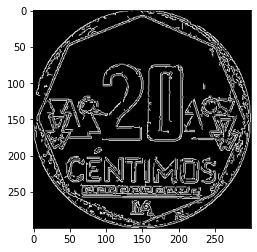

In [20]:
#@title Canny para Monedas de Referencia { run: "auto" }
op_ind = 1#@param{type:"slider", min:0, max:5, step:1}
minC = 52#@param{type:"slider", min:0, max:254, step:1}
maxC = 200#@param{type:"slider", min:0, max:255, step:1}
dfCanny(op_ind,minC,maxC)

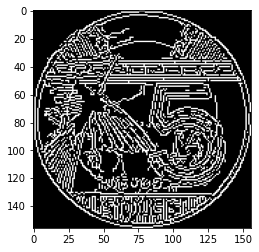

In [21]:
for i in range(len(df)):
  dfCanny(i,minC,maxC)

###Calcular el valor de las monedas

####Parte 1: Comparación pesada

In [22]:
def parte1(imMonedas,umbral=0.5,matchT=True,cv2Coef=cv2.TM_CCOEFF_NORMED):
  valInput = [0 for _ in range(len(imMonedas))] #Todas las monedas empiezan valiendo 0  
  auxInput = [-1 for _ in range(len(imMonedas))]
  f = False
  def comparar(dfRef,um):
    for j in range(len(imMonedas)):
      for i in range(len(dfRef)):
        same = False
        if matchT:  
          same,_ = compararImMatch(imMonedas[j],dfRef[i],0.7,um,cv2Coef)
        else:       
          same = compararImPearsson(imMonedas[j],dfRef[i],0.7,um)
        if same:
          valInput[j] = df_valores[i] #La imagen j ya tiene valor
          auxInput[j] = i #Guarda el indice de df que es la moneda j del input
          return True #Greedy, funciono
    return False
  k = 0
  um = umbral
  df_aux = df
  while not f:
    f = comparar(df_aux,um)
    um = um - int(k/4)*0.25
    df_aux = rotarArrIm(df_aux,cv2.ROTATE_90_CLOCKWISE)
    k += 1
  #print("k para determinar al menos 1 moneda:", k)
  return valInput, auxInput

####Parte 2: Asignación según radio

In [23]:
def parte2(circulos, valInput, auxInput, error=0.1):
  radios = circulos[:,2] # Solamente el 3er atributo (radio) de todos los circulos
  faltan = []
  ms = [] #arreglo de pendientes
  for i in range(len(circulos)):
    if auxInput[i] == -1:
      faltan.append(i)
    else:
      punto = (radios[i], df_diam[auxInput[i]] / 2 )
      ms.append(calcm((0,0),punto))
  #print("Pendientes: ",ms)
  m = np.mean(ms) #.................. | Crea la función lineal, asumiendo
  escalamiento = creaymxb(m,0) #..... | siempre que 0 px = 0 mm
  for i in faltan:
    radioReal = escalamiento(radios[i])
    for j in range(len(df_diam)):
      if abs(radioReal - (df_diam[j]/2)) < error:
        valInput[i] = df_valores[j]
  return valInput

####Implementación conjunta

In [24]:
def merge(imGris,circulos,umbral=0.5,errorRadial=0.09,matchT=True,cv2Coef=cv2.TM_CCOEFF_NORMED):
  if len(circulos) == 0:
    return 0,[],[0]
  #Separa las posibles monedas
  imMonedas, circulos = separarMonedas(circulos,imGris)
  print("Se hallaron %s círculos completos"%(len(imMonedas)))
  #print("En circulos con formato:",circulos)
  #print("Con radios: ", circulos[:,2])
  if len(circulos) == 0:
    return 0,[],[0]
  #Parte 1: Heavy. compara las imágenes input y las de referencia con Match o Pearsson.
  valInput, auxInput = parte1(imMonedas,umbral,matchT,cv2Coef)
  #print("Por ahora los valores son:",valInput)
  #Parte 2: Comparación por escala de Radios. Asigna por completo a todas las monedas, a no ser que el radio sea demasiado
  #........ asume que es un error de Hough y el círculo no es moneda (muy grande o muy pequeña)
  #print("Avanzamos a la parte 2")
  valInput = parte2(circulos,valInput,auxInput,errorRadial)
  total = 0
  for val in valInput:
    total += val
  print("===============================================================")
  print("Total:", total)
  print("Valores:",valInput)
  print("===============================================================")
  return total,valInput,imMonedas

In [25]:
def testing(totalRes, valInput,monedasEsp,totalEsp):
  errorNcirc = abs(len(valInput) - monedasEsp)
  errorSumV = abs(totalRes - totalEsp)
  return errorNcirc, errorSumV

In [26]:
def all(input,funcionF,ratioDistMin=5,maxCanny_HC=240,menosFalsos=6,umbral=0.6,usaMatchTemp=True,coefCv2Match=cv2.TM_CCOEFF_NORMED):
  baw = cv2.cvtColor(input,cv2.COLOR_RGB2GRAY)
  filtrada = funcionF(baw)
  circulos,_ = HoughCirculo(filtrada,distMin=baw.shape[0]/ratioDistMin,
                            maxCanny=int(maxCanny_HC),lessError=int(menosFalsos),
                            minRadio=int(baw.shape[0]/(ratioDistMin*2)),maxRadio=int(baw.shape[0]/ratioDistMin))
  #print("Inicialmente hay %s circulos"%len(circulos))
  #print(type(circulos))
  return merge(baw,circulos,umbral=umbral,matchT=usaMatchTemp,cv2Coef=coefCv2Match)

------------------

###Cargando la imagen

In [27]:
imagen = io.imread("https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/fondoHoja.jpg")
print(type(imagen))

<class 'numpy.ndarray'>


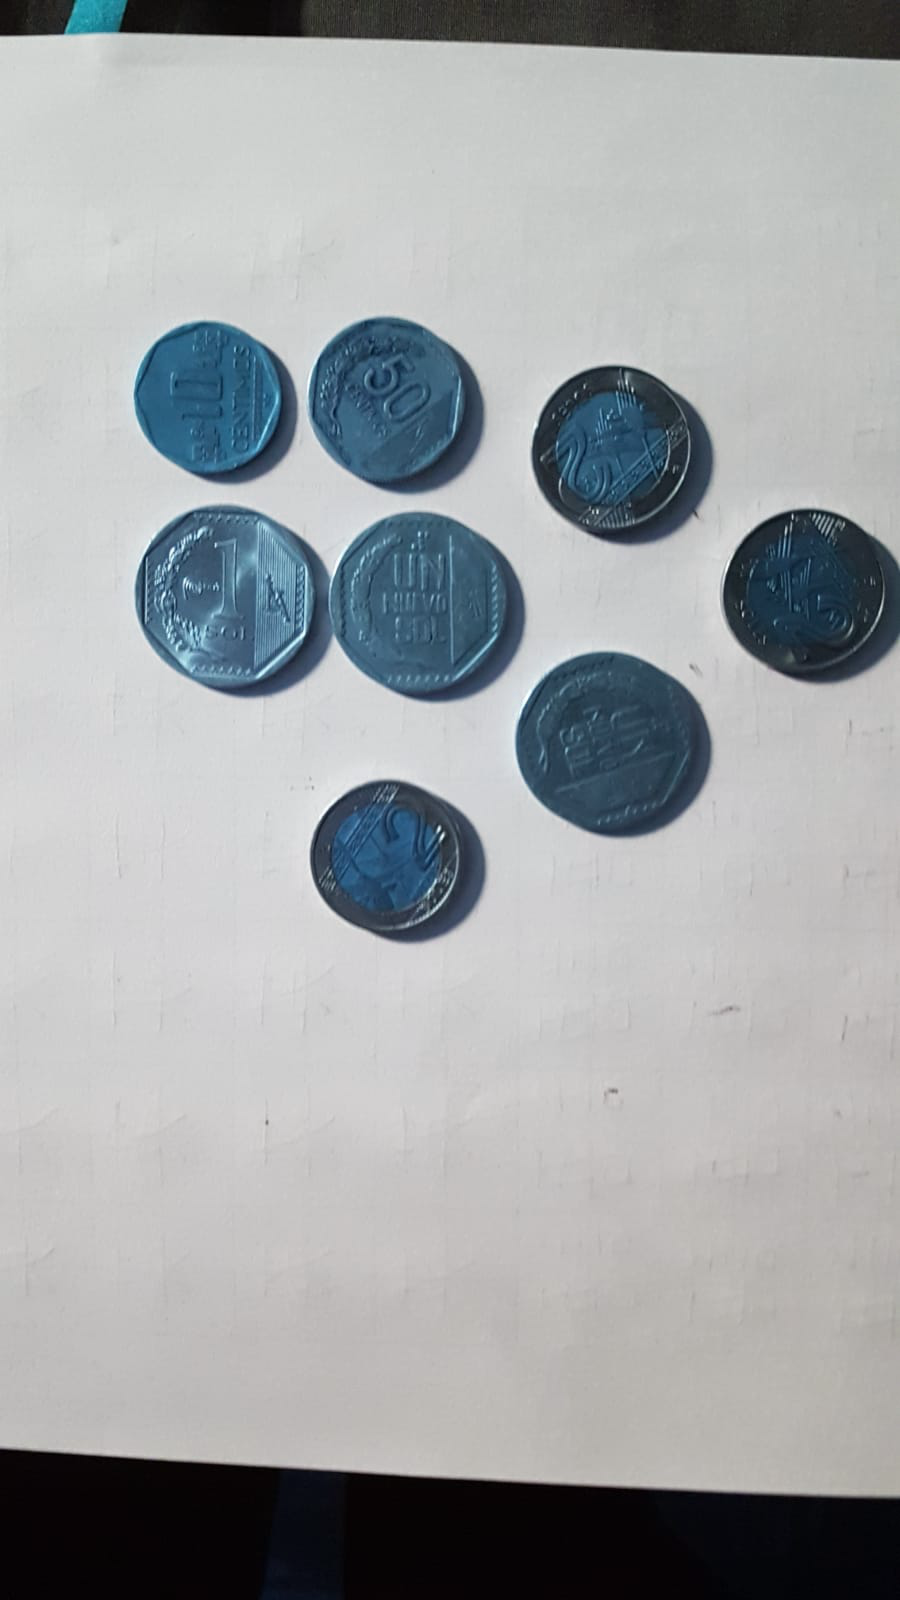

In [28]:
cv2_imshow(imagen)

###Pruebas

En la imagen de prueba hay 8 monedas, con un total de 9.6 soles

In [29]:
def graficarTest(variableValores,nombreVar,errorSuma,errorCant,titulo):
  plt.plot(variableValores, errorSuma, label = "Error en suma")
  plt.plot(variableValores, errorCant, label = "Error en número de monedas")
  plt.xlabel(nombreVar)
  plt.ylabel('Error')
  plt.title(titulo)
  plt.legend()
  plt.show()  

#### Usando Sobel

#####Evaluando las variables de la transformada de Hough

In [ ]:
f_sobel = funcionFiltro(sobel_prewitt,c=2,usaC=True)

Auxiliarmente, por defecto implementa también MatchTemplate para asignar el valor de la moneda.

**Distancia mínima entre círculos**

In [ ]:
arrESuma = []
arrECant = []
for i in range(1,10):
  total,valores,_ = all(imagen,f_sobel,ratioDistMin=i)
  eCant, eSum = testing(total,valores,monedasEsp=8,totalEsp=9.6)
  arrESuma.append(eSum)
  arrECant.append(eCant)

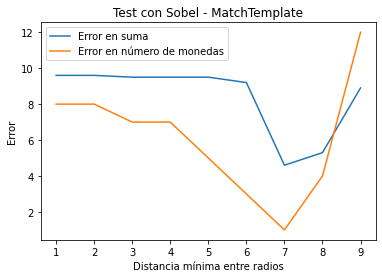

In [ ]:
eje_x = [i for i in range(1,10)]
graficarTest(eje_x,"Distancia mínima entre radios",arrESuma,arrECant,"Test con Sobel - MatchTemplate")

En la imagen de prueba, al utilizar Sobel como operador de contornos y comparación con Match Template, la distancia óptima mínima entre radios para la transformada de Hough parece ser 7

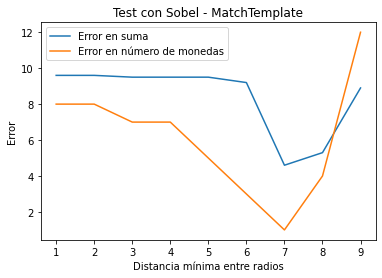

**Parámetro 1 de Hough: maxVal de Canny interno**

In [ ]:
arrESuma = []
arrECant = []
eje_x = [i for i in range(230,250)] #MaxVal de Canny interno de Hough
for i in eje_x:
  total,valores,_ = all(imagen,f_sobel,ratioDistMin=7,maxCanny_HC=i)
  eCant, eSum = testing(total,valores,monedasEsp=8,totalEsp=9.6)
  arrECant.append(eCant)
  arrESuma.append(eSum)

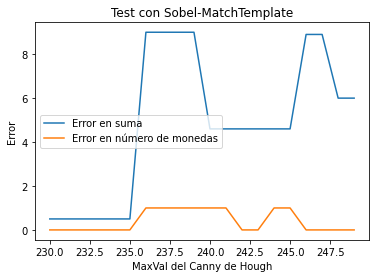

In [ ]:
graficarTest(eje_x,"MaxVal del Canny de Hough",arrESuma,arrECant,"Test con Sobel-MatchTemplate")

Por los resultados, la influencia del maxVal del filtro Canny que implementa HoughCircles de OpenCV no describe una curva fácil de interpretar. Los valores óptimos de MaxVal interno de Hough para la imagen de prueba, con la distancia mínima radial fija en 7, usando Sobel y MatchTemplate para comparar los candidatos a monedas con las imágenes de referencia parece estar por debajo de 235.

Aunque la suma total de los valores aún cuenta con error considerable, la precisión del número de monedas está mejorando. Es decir, el resultado pertinente a la transformada de Hough, identificar los círculos que podrían ser monedas, ha mejorado con estas características.

**Parámetro 2: Falsos positivos**

In [ ]:
arrESuma = []
arrECant = []
eje_x = [i for i in range(1,10)] #Falsos positivos
for i in eje_x:
  total,valores,_ = all(imagen,f_sobel,ratioDistMin=7,maxCanny_HC=234,menosFalsos=i)
  eCant, eSum = testing(total,valores,monedasEsp=8,totalEsp=9.6)
  arrESuma.append(eSum)
  arrECant.append(eCant)

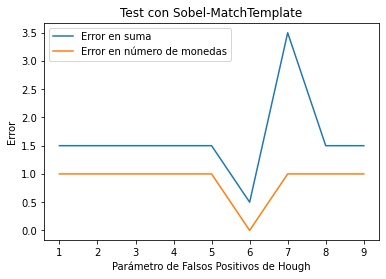

In [ ]:
graficarTest(eje_x,"Parámetro de Falsos Positivos de Hough",arrESuma,arrECant,"Test con Sobel-MatchTemplate")

El valle obvio está en el valor 6. Sin embargo, por la irregularidad del comportamiento de la curva resultante, podría ser una anomalia. Para este caso en específico resulta un buen valor; y acorde a la teoría de la transformada de Hough, los valores pequeños del segundo parámetro ayudan a descartar falsos positivos.

##### Entonces:
La combinación que mejor rinde para la imagen de prueba para la transformada de Hough, encargada de identificar los círculos sería: 
- parámetro 1 de Hough: entre 230 y 234
- parámetro 2 de Hough: 6

Específicamente en la imagen, el mejor valor para la distancia mínima entre círculos es 7.

##### Variables de la comparación

###### **Umbral con MatchTemplate**

In [ ]:
arrESuma = []
arrECant = []
eje_x = [i/10 for i in range(1,10)] #Umbral
for i in eje_x:
  total,valores,_ = all(imagen,f_sobel,ratioDistMin=7,maxCanny_HC=234,menosFalsos=6,umbral=i)
  eCant, eSum = testing(total,valores,monedasEsp=8,totalEsp=9.6)
  arrESuma.append(eSum)
  arrECant.append(eCant)

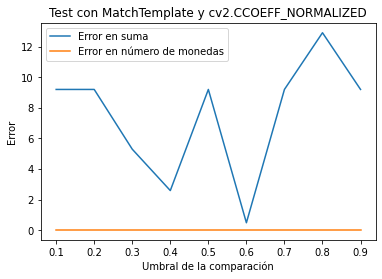

In [ ]:
graficarTest(eje_x,"Umbral de la comparación",arrESuma,arrECant,"Test con MatchTemplate y cv2.CCOEFF_NORMALIZED")

El umbral de la comparación está implementado para definir en la primera parte del algoritmo el valor numérico de la candidata a moneda. Se esperaría que en valores bajos, al tener poca exigencia, el error aumentara. Por otro lado, con un valor mayor aumenta la exigencia, puediendo descartar monedas por ruido. Para este caso específico, con MatchTemplate, el umbral 0.6 es el más adecuado.

Además, el error en número de monedas identificadas se ha reducido considerablemente. Por lo que el ajuste según los resultados de la sección de pruebas anterior para la transformada de Hough parece dar buenos resultados.

###### **Umbral con Coeficiente de Pearson**

In [ ]:
arrESuma = []
arrECant = []
eje_x = [i/10 for i in range(1,10)] #Umbral
for i in eje_x:
  total,valores,_ = all(imagen,f_sobel,ratioDistMin=7,maxCanny_HC=234,menosFalsos=6,umbral=i,usaMatchTemp=False)
  eCant, eSum = testing(total,valores,monedasEsp=8,totalEsp=9.6)
  arrESuma.append(eSum)
  arrECant.append(eCant)

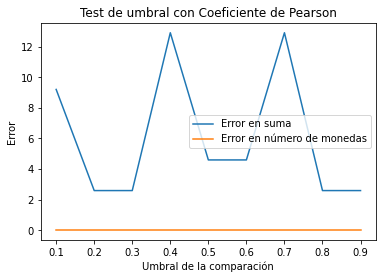

In [ ]:
graficarTest(eje_x,"Umbral de la comparación",arrESuma,arrECant,"Test de umbral con Coeficiente de Pearson")

El comportamiento es un poco más caótico que con MatchTemplate. De igual manera, el valor de umbral puede terminar aceptando monedas no correspondientes, o ser muy exigente y descartar monedas.

###### Entonces:

Para la imagen estudiada, la mejor opción resulta ser Template Matching con un umbral 0.6

####Usando Canny

In [ ]:
arrESuma = []
arrECant = []
eje_x = [i for i in range(10,100,5)] #MinVal de Canny
for i in eje_x:
  f_canny = funcionFiltro(isCanny=True,minC=i)
  total,valores,_ = all(imagen,f_canny,ratioDistMin=7,maxCanny_HC=234,menosFalsos=6,umbral=0.6,usaMatchTemp=True)
  eCant, eSum = testing(total,valores,monedasEsp=8,totalEsp=9.6)
  arrESuma.append(eSum)
  arrECant.append(eCant)

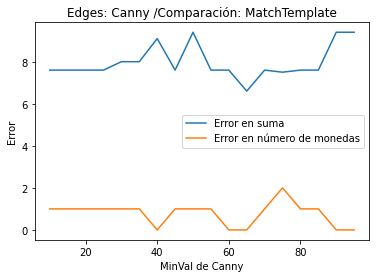

In [35]:
graficarTest(eje_x,"MinVal de Canny",arrESuma,arrECant,"Edges: Canny /Comparación: MatchTemplate")

El filtro Canny se aplica al principio, dependiendo de su efectividad la transformada de Hough. La variación del error en el número de monedas muestra esto, ya que el resto de parámetros se ajustaron acorde a las pruebas anteriores. 

El rango entre minVal y maxVal en el filtro de Canny define la performance de esta herramienta, así que se hace necesario probar las combinaciones (minVal, maxVal):

In [ ]:
imESuma = np.zeros((18,18),dtype=np.uint8)
imECant = np.zeros((18,18),dtype=np.uint8)
val_MinMax = [[[i,j] for i in range(10,100,5)] for j in range(165,255,5)] #MinVal de Canny
for i in range(18): #maxVal
  for j in range(18): #minVal
    c_minimo = val_MinMax[i][j][0]
    c_maximo = val_MinMax[i][j][1]
    f_canny = funcionFiltro(isCanny=True,minC=c_minimo,maxC=c_maximo)
    total,valores,_ = all(imagen,f_canny,ratioDistMin=7,maxCanny_HC=234,menosFalsos=6,umbral=0.6,usaMatchTemp=True)
    eCant, eSum = testing(total,valores,monedasEsp=8,totalEsp=9.6)
    imESuma[i][j] = eSum
    imECant[i][j] = eCant

In [53]:
imESuma = img_as_ubyte(imESuma) #..... Homogeneizar para trabajar en np.uint8 ...........
imECant = img_as_ubyte(imECant) #..... Homogeneizar para trabajar en np.uint8 ...........

<Figure size 432x288 with 0 Axes>

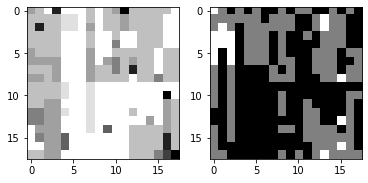

In [56]:
plt.figure()
_, axarr = plt.subplots(1,2) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(imESuma,cmap='gray')
axarr[1].imshow(imECant,cmap='gray')

Las imágenes tienen en cada pixel $(i,j)$ el error al usar $minVal = 10 + 5i$ y $maxVal = 165+ 5j$.


Por ende, buscamos las ubicaciones de los pixeles más oscuros, ya que el error sería más bajo

En la imagen izquierda están los resultados del error de la suma total; mientras que la derecha contiene el error de número de monedas detectadas.

In [61]:
for i in range(18):
  for j in range(18):
    if imESuma[i][j] < 3 and imECant[i][j] < 3:
      print("(%s,%s) con error de suma %s, y cantidad %s"%(i,j,imESuma[i][j],imECant[i][j]))

(0,3) con error de suma 2, y cantidad 1
(0,11) con error de suma 1, y cantidad 1
(2,1) con error de suma 2, y cantidad 2
(7,12) con error de suma 2, y cantidad 1
(10,16) con error de suma 1, y cantidad 1
(15,16) con error de suma 2, y cantidad 1
(16,16) con error de suma 2, y cantidad 1
(17,17) con error de suma 1, y cantidad 1


Tras identificar los pixeles donde el error sea menor a un umbral en las dos métricas, no se pudo encontrar una combinación óptima para ambos casos.

In [ ]:
baw = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

In [ ]:
#@title Canny { run: "auto" }
minC = 70#@param{type:"slider", min:0, max:254, step:1}
maxC = 210#@param{type:"slider", min:0, max:255, step:1}
im_canny = cv2.Canny(baw,minC,maxC)
plt.imshow(im_canny,cmap='gray')

In [ ]:
total, aux1, imAuxs = merge(baw,im_canny,maxC,umbral=0.6,matchT=False)
testing(total,aux1,8,9.6)

In [ ]:
cv2_imshow(imAuxs)

## Conclusiones

Ya que el acercamiento al problema de detección y cálculo de monedas en una imagen dividió el proceso en varias etapas, el número de variables a considerar incrementaron.
* Los resultados de testeo dependen de la imagen estudiada. Los mismos parámetros no satisfacen de manera óptima a distintas imágenes
* En el filtro de Canny, importa el estudio de *minVal* y *maxVal* juntos. El rango con el que Canny rechaza o acepta bordes es la verdadera variable. Sin embargo, este estudio eleva mucho la complejidad. Por practicidad, se recomienda que minVal no esté exagerademente bajo. Se debe recordar que aumentar el rango entre *minVal* y *maxVal* puede hacer al problema más costoso computacionalmente, ya que podría evaluar más bordes intermedios. La combinación óptima de minVal y maxVal al usar Canny como detector de bordes está muy relacionada a la imagen.
* Según la teoría, el rendimiento de los operadores clásicos para detección de bordes se ve comprometido con imágenes con ruido. Aunque no se lograron realizar las pruebas necesarias desde este estudio, en Sharifi et al. (2002) se aprecia claramente la diferencia entre los operadores clásicos y los de Gauss (Canny). Explícitamente, es citado como un algoritmo más preciso que la mayoría de operadores; sin embargo, requiere de un ajuste en minVal y maxVal que los operadores como Sobel, Roberts e incluso Kirsch, no necesitan.
* La técnica planteada tiene precisión muy variable, muchas veces corta. Se pueden ajustar varios parámetros, incluso el coeficiente que utiliza matchTemplate para buscar una moneda para buscar un mejor resultado. Viendo que en los resultados el primer error que se logra reducir es el de número de círculos detectados, la parte más debil del algoritmo planteado es la asignación de valores con comparación con MatchTemplate o coeficiente de Pearson.
* Una estrategia no implementada, que aumentaría la complejidad de la asignación de valores, habría sido comparar las porciones de los candidatos a monedas en más posiciones, ya que actualmente solamente busca en 4 ángulos (rotando cada 90°). Antes de disminuir el umbral, se podría haber comparado también las versiones con el filtro inicial.
* Otra estrategia que no pudo implementarse por su complejidad era la de asignar según la transformada de Hough para líneas. Este acercamiento habría buscado identificar las formas dentro de la moneda.
* Además de la confusión por radios (entre monedas de 0.50 soles con 2 soles), un error común fue la asignación de 10 centavos a monedas no correspondientes, mucho más común con las de 1 sol. Probablemente un mejor acercamiento con MatchTemplate sería haber identificado características únicas, o realizar un modelo de búsqueda en el que, por ejemplo, tras encontrar la forma del número '1', también busca el '0' para descartar o asignar a la moneda 10 centavos o 1 sol. Esta técnica probablemente tendría que ser más estricta, quitando la disminución del umbral. 


## Bibliografía

* Martinez, J. (2020) *Understanding and implementing shape detection using Hough Transform with OpenCV and Python*. Recuperado de: https://livecodestream.dev/post/2020-05-26-hough-transformation/ 
* Open CV. Python Tutorials. *Canny Edge Detection* Recuperado de: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
* Open CV. Python Tutorials. *Template Matching*. Recuperado de: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html 
* Programmer Sought. *Roberts, Sobel, Prewitt, Kirsch, Canny, Laplacian image edge detection principle and its code implementation*. Recuperado de: https://www.programmersought.com/article/2672737346/ 
* Rani, R. & Kumari, S. (2016) *An approach of detecting discontinuities in images*. Recuperado de: https://pdfs.semanticscholar.org/55e0/6c28291d943aaa481ecd669bce328d54fe74.pdf
* Sharifi, M., Fathy, M. & Tayefeh Mahmoudi, M. (2002) *A Classified and Comparative Study of Edge Detection Algorithms*. Recuperado de: http://www.es.ele.tue.nl/~heco/courses/PlatformDesign2008/WiCa-assignment/01000371.pdf